## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse
from sklearn import datasets, linear_model
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math


In [186]:
df = pd.read_csv("data/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Cleaning Data

In [188]:
df["id"].duplicated().sum()

177

In [189]:
df["id"].duplicated()
duplicate = df[df["id"].duplicated(keep=False)].sort_values("id")
duplicate

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2495,1000102,4/22/2015,300000.0,6,3.00,2400,9373,2.0,0.0,0.0,...,7,2400,0.0,1991,0.0,98002,47.3262,-122.214,2060,7316
2494,1000102,9/16/2014,280000.0,6,3.00,2400,9373,2.0,NaN,0.0,...,7,2400,0.0,1991,0.0,98002,47.3262,-122.214,2060,7316
16800,7200179,10/16/2014,150000.0,2,1.00,840,12750,1.0,0.0,0.0,...,6,840,0.0,1925,0.0,98055,47.4840,-122.211,1480,6969
16801,7200179,4/24/2015,175000.0,2,1.00,840,12750,1.0,0.0,0.0,...,6,840,0.0,1925,NaN,98055,47.4840,-122.211,1480,6969
11422,109200390,10/20/2014,250000.0,3,1.75,1480,3900,1.0,0.0,0.0,...,7,1480,0.0,1980,0.0,98023,47.2977,-122.367,1830,6956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6339,9828200460,6/27/2014,260000.0,2,1.00,700,4800,1.0,0.0,0.0,...,7,700,0.0,1922,0.0,98122,47.6147,-122.300,1440,4800
15186,9834200305,2/10/2015,615000.0,3,1.00,1790,3876,1.5,0.0,0.0,...,7,1090,700.0,1904,0.0,98144,47.5750,-122.288,1360,4080
15185,9834200305,7/16/2014,350000.0,3,1.00,1790,3876,1.5,0.0,0.0,...,7,1090,?,1904,0.0,98144,47.5750,-122.288,1360,4080
1084,9834200885,7/17/2014,360000.0,4,2.50,2080,4080,1.0,0.0,0.0,...,7,1040,1040.0,1962,0.0,98144,47.5720,-122.290,1340,4080


Did find some duplicated id's, but it was just the house being resold. Could give some insight to price per date, but little data. Only 177 duplicates


In [190]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

## Dealing with object data type

Both sqft_basement and date are objects 

In [191]:
df['sqft_basement'].value_counts(normalize=True)

0.0       0.593879
?         0.021021
600.0     0.010048
500.0     0.009677
700.0     0.009631
            ...   
225.0     0.000046
283.0     0.000046
2570.0    0.000046
1852.0    0.000046
248.0     0.000046
Name: sqft_basement, Length: 304, dtype: float64

Either these homes don't have a basement or they didn't know the sq. footage. We should be able to get this from the difference of sqft_livingsquare and sqft_above

In [192]:
for x in df['sqft_basement']:
    if x == '?':
        df['sqft_basement'] = df['sqft_living'] - df['sqft_above'] 

In [193]:
df['sqft_basement'].value_counts(normalize=True)

0       0.607029
600     0.010233
700     0.010094
500     0.009909
800     0.009538
          ...   
792     0.000046
2590    0.000046
935     0.000046
2390    0.000046
248     0.000046
Name: sqft_basement, Length: 306, dtype: float64

In [194]:

df= df.drop('date', axis=1)

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

# Missing Data

 Missing waterfront, yr_renovated, view

In [196]:
df.waterfront.value_counts(normalize=True)

0.0    0.992404
1.0    0.007596
Name: waterfront, dtype: float64

99% of data are not waterfront, so it's safe to fill in missing data with 0.0

In [197]:
df['waterfront'] = df['waterfront'].fillna(0.0)

In [198]:
df.yr_renovated.value_counts(normalize=True)

0.0       0.958096
2014.0    0.004112
2003.0    0.001746
2013.0    0.001746
2007.0    0.001690
            ...   
1946.0    0.000056
1959.0    0.000056
1971.0    0.000056
1951.0    0.000056
1954.0    0.000056
Name: yr_renovated, Length: 70, dtype: float64

In [199]:
df['yr_renovated'].isna().sum()

3842

In [200]:
df['yr_renovated'] = df['yr_renovated'].fillna(0)

In [201]:
df.view.value_counts(normalize=True)

0.0    0.901923
2.0    0.044441
3.0    0.023591
1.0    0.015325
4.0    0.014721
Name: view, dtype: float64

In [202]:
df['view'] = df['view'].fillna(0)

In [203]:
df.isna().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  float64
 8   view           21597 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

# Baseline Model

In [205]:
X = df.drop('price', axis=1)
y = df['price']

model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2798.
Date:                Thu, 25 Mar 2021   Prob (F-statistic):               0.00
Time:                        18:09:10   Log-Likelihood:            -2.9439e+05
No. Observations:               21597   AIC:                         5.888e+05
Df Residuals:                   21578   BIC:                         5.890e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.906e+06   2.93e+06      2.356      0.019    1.16e+06    1.27e+07
id            -1.304e-06   4.83e-07     -2.701      0.007   -2.25e-06   -3.58e-07
bedrooms      -3.591e+04   1900.606    -18.893      0.000   -3.96e+04   -3.22e+04
bathrooms      4.156e+04   3262.635     12.737      0.000    3.52e+04     4.8e+04
sqft_living     110.0572      2.278     48.322      0.000     105.593     114.521
sqft_lot          0.1223      0.048      2.548      0.011       0.028       0.216
floors         7077.8441   3600.765      1.966      0.049      20.079    1.41e+04
waterfront     6.181e+05   1.81e+04     34.082      0.000    5.83e+05    6.54e+05
view           5.346e+04   2122.908     25.182      0.000    4.93e+04    5.76e+04
condition      2.664e+04   2346.646     11.351      0.000     2.2e+04    3.12e+04
grade          9.698e+04   2160.958     44.879      0.000    9.27e+04    1.01e+05
sqft_above       70.6397      2.254     31.333      0.000      66.221      75.059
sqft_basement    39.4225      2.648     14.885      0.000      34.232      44.614
yr_built      -2638.2373     71.933    -36.676      0.000   -2779.231   -2497.244
yr_renovated     23.4008      3.977      5.883      0.000      15.605      31.197
zipcode        -584.6188     32.990    -17.721      0.000    -649.282    -519.956
lat            6.005e+05   1.07e+04     55.919      0.000    5.79e+05    6.22e+05
long          -2.159e+05   1.32e+04    -16.386      0.000   -2.42e+05    -1.9e+05
sqft_living15    21.6055      3.450      6.262      0.000      14.843      28.368
sqft_lot15       -0.4040      0.074     -5.494      0.000      -0.548      -0.260
==============================================================================
Omnibus:                    18379.263   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1853325.721
Skew:                           3.572   Prob(JB):                         0.00
Kurtosis:                      47.816   Cond. No.                     3.19e+22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.19e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Exploration 2.0

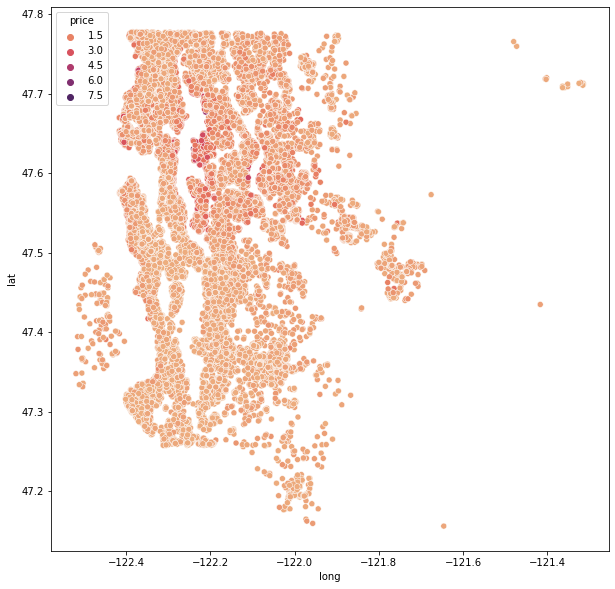

In [206]:
plt.figure(figsize = (10,10))
sns.scatterplot(x='long',y='lat',hue='price',data=df, palette="flare")
;
plt.savefig('Price by Location')

Look like waterfront has higer prices maybe

In [207]:
water = df.loc[df.waterfront==1,'price'].mean()
nowater = df.loc[df.waterfront==0,'price'].mean()
print(water)
print(nowater)

1717214.7260273972
532286.2219943126


In [208]:
water/nowater*100

322.6111545013362

That's a lot higher average price

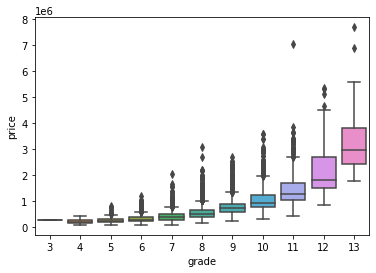

In [209]:
sns.boxplot(x=df['grade'], y=df['price'])
plt.savefig('grade')

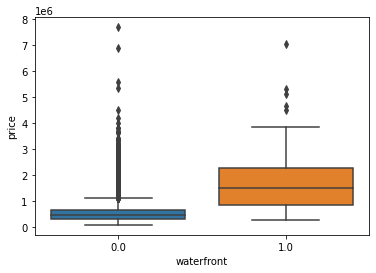

In [210]:
sns.boxplot(x=df['waterfront'], y=df['price'])
plt.savefig('waterfront')

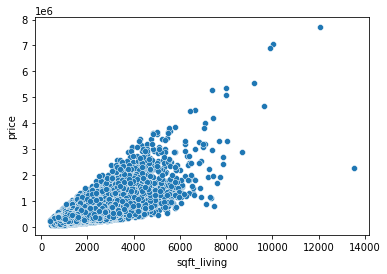

In [211]:
sns.scatterplot(x=df['sqft_living'], y=df['price'])
plt.savefig('sqfoot')

## categorical data

In [212]:
df.view.value_counts(normalize=True)

0.0    0.902209
2.0    0.044312
3.0    0.023522
1.0    0.015280
4.0    0.014678
Name: view, dtype: float64

In [213]:
#dropping id since it i simply an identifier 
df2=df.drop(['id'], axis=1)
df2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503


## categorical data 2.0


 Taking a look at some suspected categoricals

In [214]:
var_categories =  {'condition', 'waterfront', 'floors', 'bedrooms' , 'view', 'grade'}

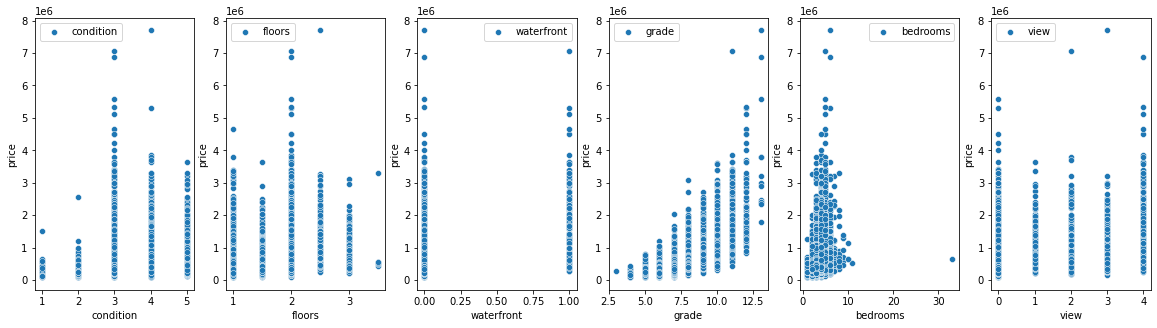

In [215]:
fig, axes = plt.subplots(nrows=1, ncols=len(var_categories), figsize=(20,5))
for xcol, ax in zip(var_categories, axes):
    sns.scatterplot(x=df2[xcol], y=df2['price'] , ax=ax, label=xcol,)

In [248]:
#above 30 bedrooms? no thanks. let's remove that so we can see better
df2 = df2[df2['bedrooms'] < 30]

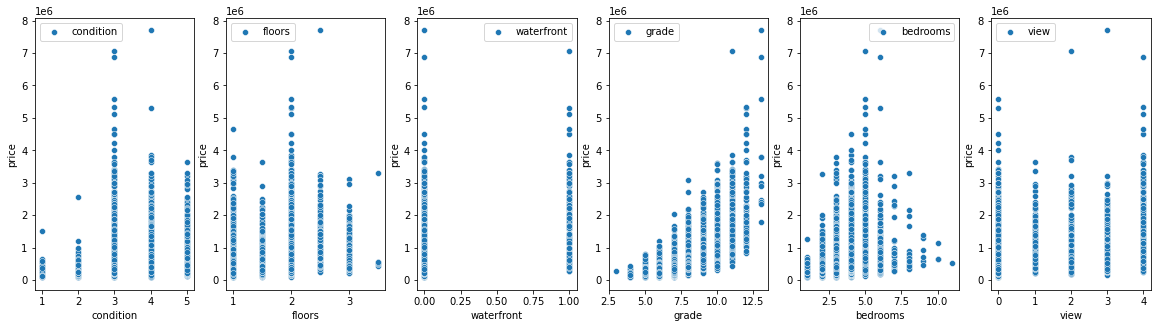

In [217]:
fig, axes = plt.subplots(nrows=1, ncols=len(var_categories), figsize=(20,5))
for xcol, ax in zip(var_categories, axes):
    sns.scatterplot(x=df2[xcol], y=df2['price'] , ax=ax, label=xcol,)

In [252]:
df_categories = pd.DataFrame()

for cat in var_categories:
    df_categories[cat]=df2[cat].astype('category')
    df_dummy = pd.get_dummies(df_categories[cat], prefix=cat, drop_first=True) 
    df_categories = df_categories.join(df_dummy)
    df_categories.drop(labels=cat, axis=1, inplace=True)

In [253]:
df_categories.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   condition_2     21596 non-null  uint8
 1   condition_3     21596 non-null  uint8
 2   condition_4     21596 non-null  uint8
 3   condition_5     21596 non-null  uint8
 4   floors_1.5      21596 non-null  uint8
 5   floors_2.0      21596 non-null  uint8
 6   floors_2.5      21596 non-null  uint8
 7   floors_3.0      21596 non-null  uint8
 8   floors_3.5      21596 non-null  uint8
 9   waterfront_1.0  21596 non-null  uint8
 10  grade_4         21596 non-null  uint8
 11  grade_5         21596 non-null  uint8
 12  grade_6         21596 non-null  uint8
 13  grade_7         21596 non-null  uint8
 14  grade_8         21596 non-null  uint8
 15  grade_9         21596 non-null  uint8
 16  grade_10        21596 non-null  uint8
 17  grade_11        21596 non-null  uint8
 18  grade_12        21596 non-

In [254]:
df3= df2.drop(var_categories, axis=1)

In [255]:
df3 = pd.concat([df3, df_categories], axis=1)


In [256]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 47 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           21596 non-null  float64
 1   bathrooms       21596 non-null  float64
 2   sqft_living     21596 non-null  int64  
 3   sqft_lot        21596 non-null  int64  
 4   sqft_above      21596 non-null  int64  
 5   sqft_basement   21596 non-null  int64  
 6   yr_built        21596 non-null  int64  
 7   yr_renovated    21596 non-null  float64
 8   zipcode         21596 non-null  int64  
 9   lat             21596 non-null  float64
 10  long            21596 non-null  float64
 11  sqft_living15   21596 non-null  int64  
 12  sqft_lot15      21596 non-null  int64  
 13  condition_2     21596 non-null  uint8  
 14  condition_3     21596 non-null  uint8  
 15  condition_4     21596 non-null  uint8  
 16  condition_5     21596 non-null  uint8  
 17  floors_1.5      21596 non-null 

# Multicollinearity

<AxesSubplot:>

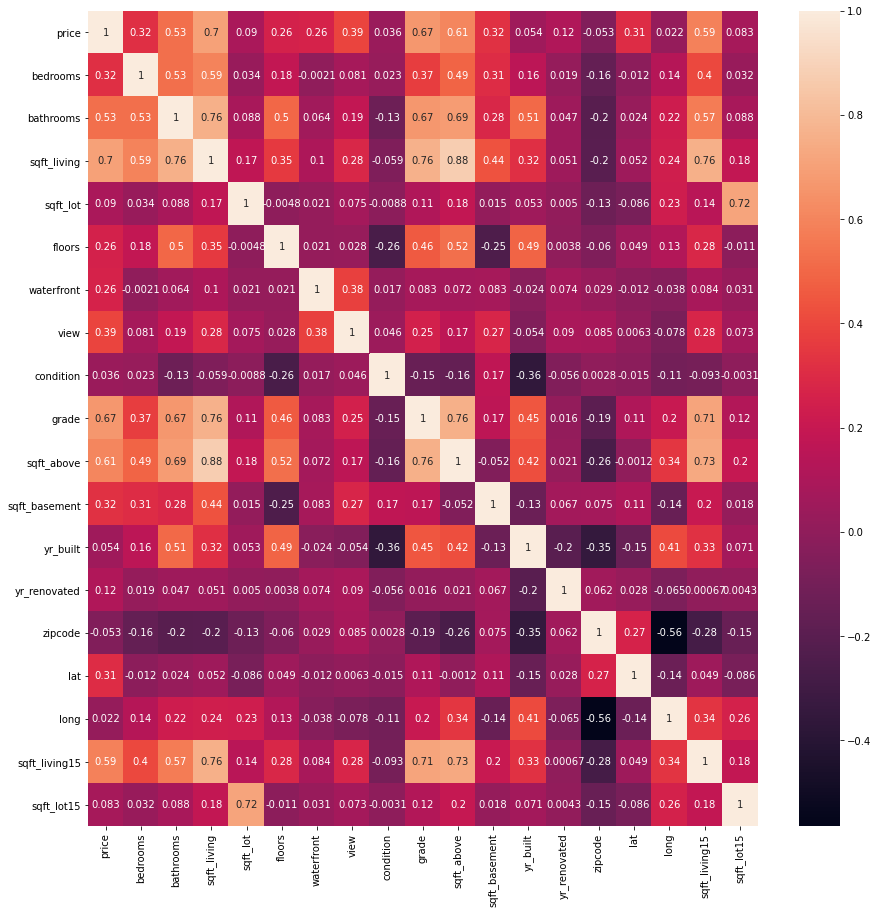

In [257]:
cor = df2.corr()
plt.figure(figsize=(15,15))
sns.heatmap(cor, annot=True)

sqft_living is a problem because it is sqft_above + sqft_bsement
removing it but will hurt our score since it has highest cor with price
sqft_living15 is also a problem 
see how it looks afterwards


<AxesSubplot:>

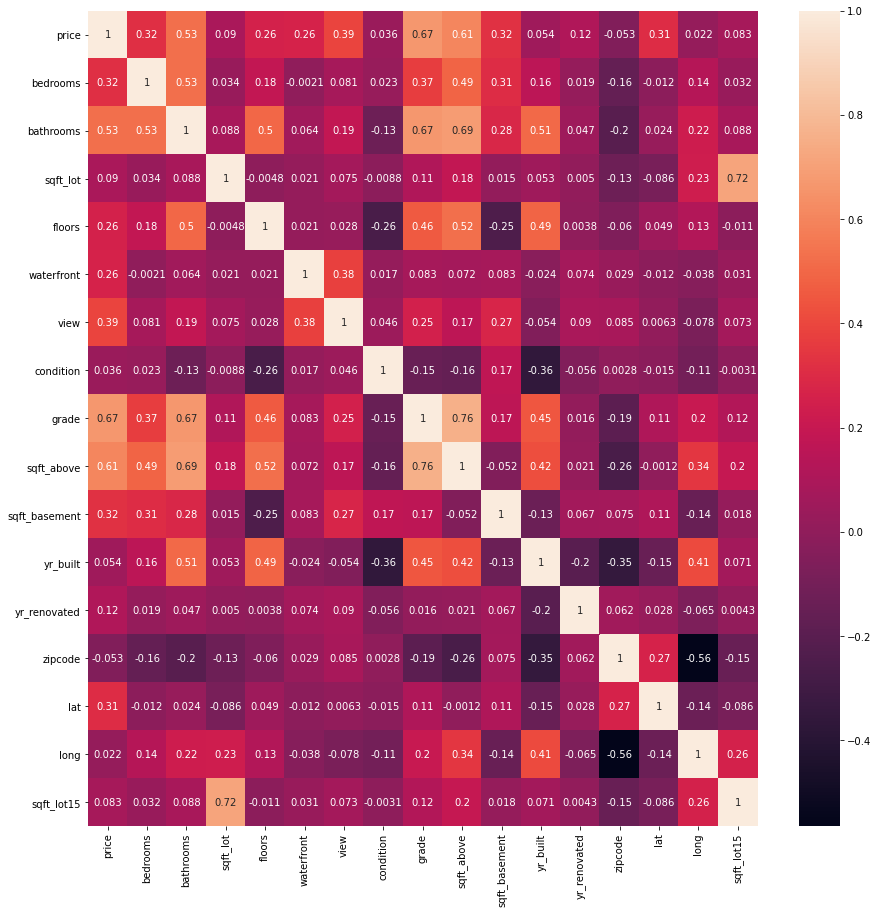

In [258]:
df4 = df2.drop(['sqft_living', 'sqft_living15'], axis=1)
cor4 = df4.corr()
plt.figure(figsize=(15,15))
sns.heatmap(cor4, annot=True)

Looks a bit better. Still some problems in grade and sqft_lot15 but I'll keep for now

In [259]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21596 non-null  float64
 1   bedrooms       21596 non-null  int64  
 2   bathrooms      21596 non-null  float64
 3   sqft_lot       21596 non-null  int64  
 4   floors         21596 non-null  float64
 5   waterfront     21596 non-null  float64
 6   view           21596 non-null  float64
 7   condition      21596 non-null  int64  
 8   grade          21596 non-null  int64  
 9   sqft_above     21596 non-null  int64  
 10  sqft_basement  21596 non-null  int64  
 11  yr_built       21596 non-null  int64  
 12  yr_renovated   21596 non-null  float64
 13  zipcode        21596 non-null  int64  
 14  lat            21596 non-null  float64
 15  long           21596 non-null  float64
 16  sqft_lot15     21596 non-null  int64  
dtypes: float64(8), int64(9)
memory usage: 3.6 MB


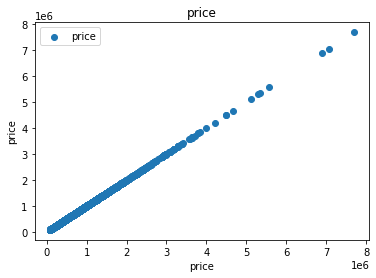

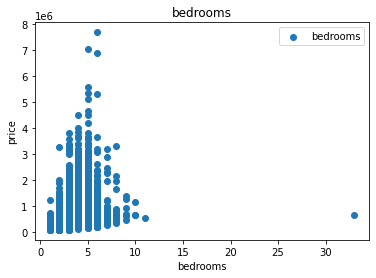

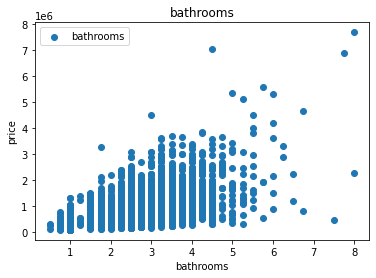

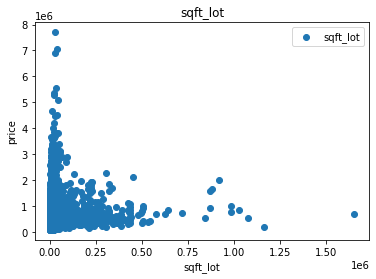

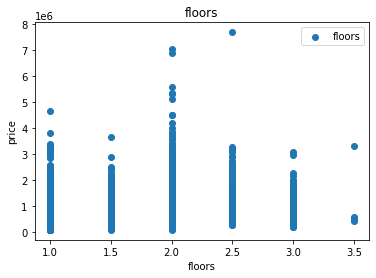

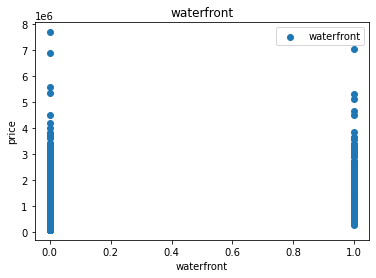

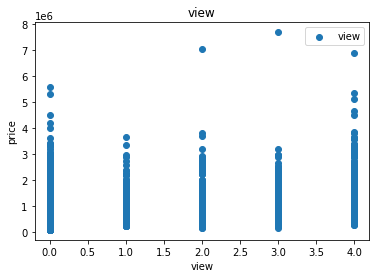

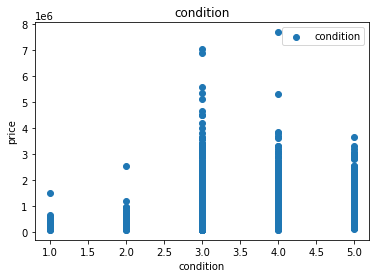

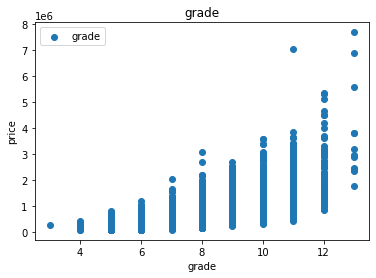

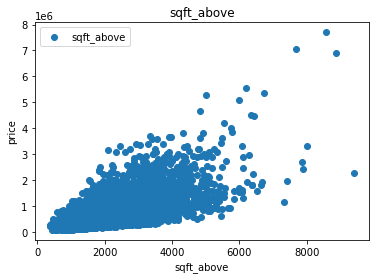

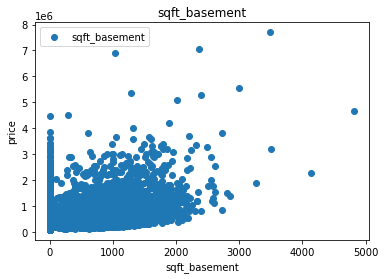

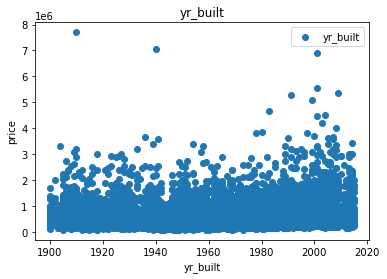

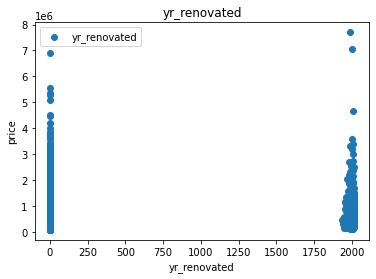

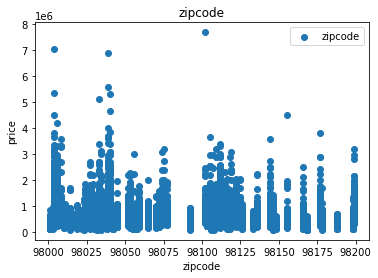

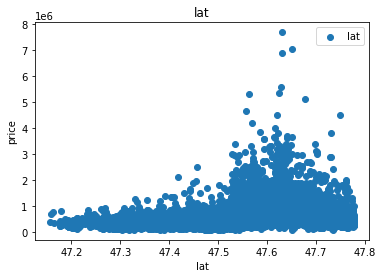

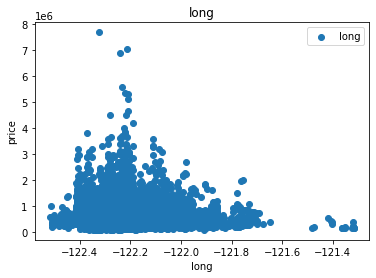

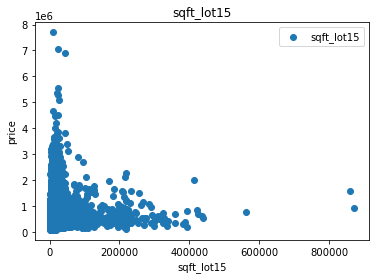

In [260]:
for col in df4.columns: 
    plt.scatter(df[col], df.price, label=col)
    plt.legend()
    plt.xlabel(col)
    plt.ylabel('price')
    plt.title(col)
    plt.show()

id',yr_built', 'yr_renovated', 'sqft_lot', 'sqft_lot15'

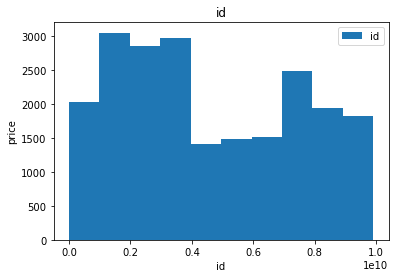

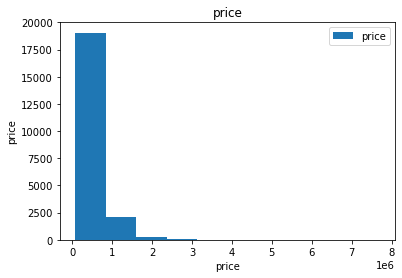

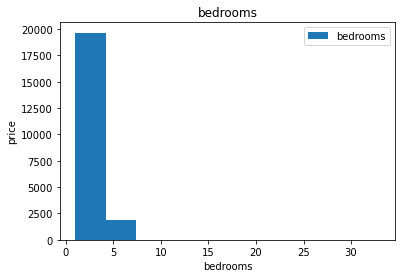

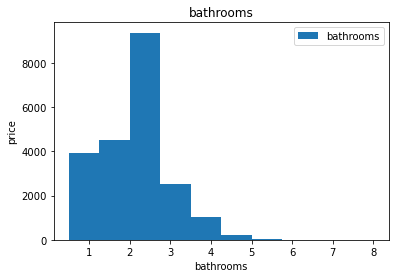

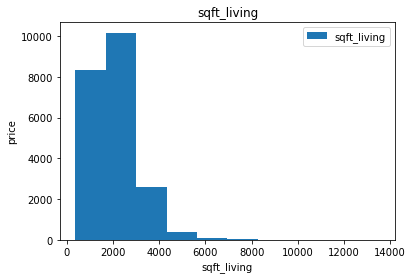

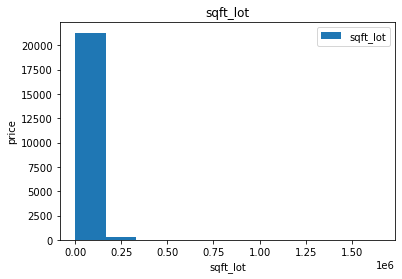

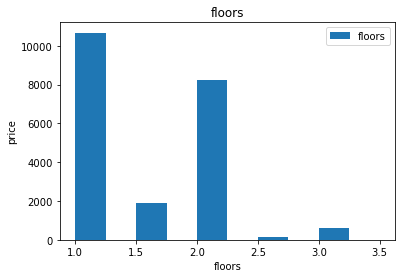

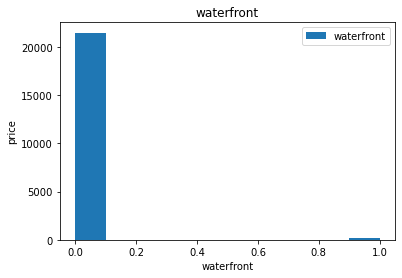

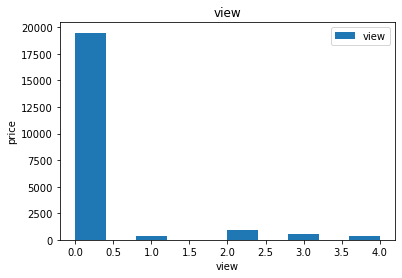

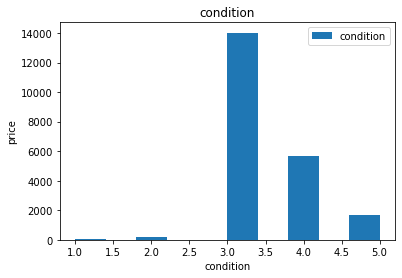

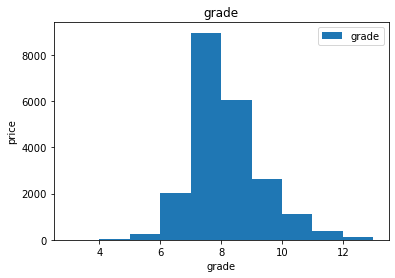

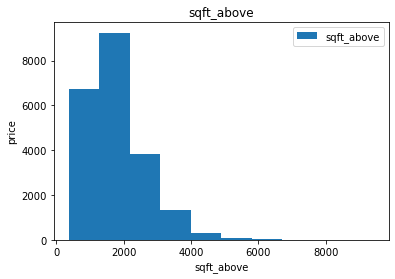

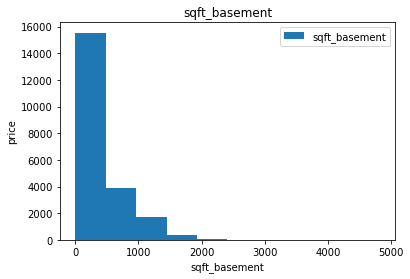

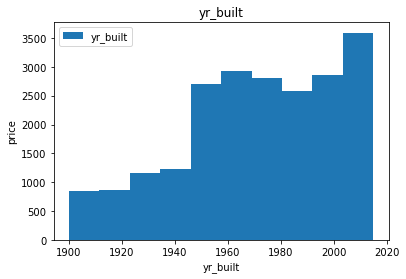

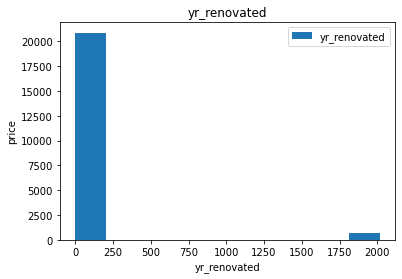

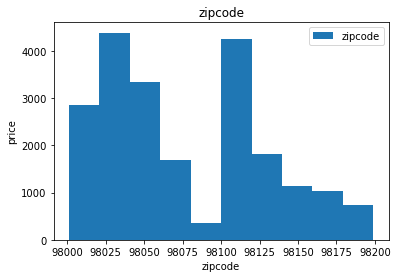

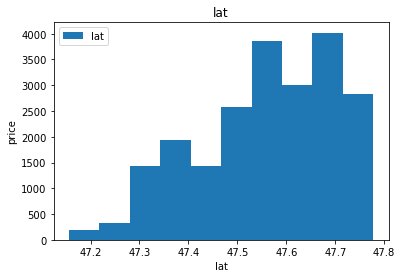

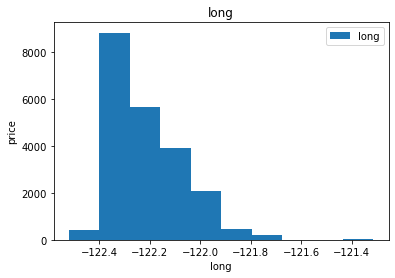

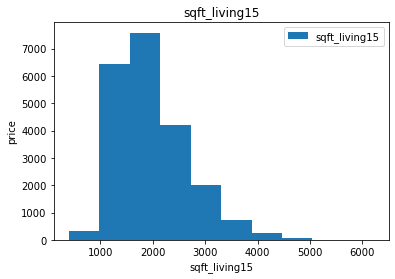

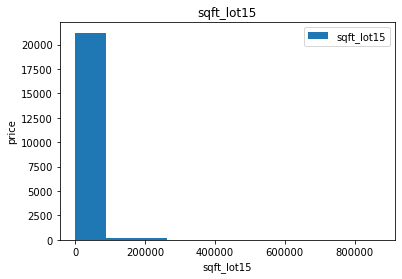

In [261]:
for col in df.columns: 
    plt.hist(df[col], label=col)
    plt.legend()
    plt.xlabel(col)
    plt.ylabel('price')
    plt.title(col)
    plt.show()

price	bathrooms	sqft_lot	sqft_above	sqft_basement	yr_built	yr_renovated	zipcode	lat	long	sqft_lot15

# Continuous

In [262]:
var_cont = df4.drop(var_categories, axis=1) 
var_cont.head()

,price,bathrooms,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_lot15
0,221900.0,1.00,5650,1180,0,1955,0.0,98178,47.5112,-122.257,5650
1,538000.0,2.25,7242,2170,400,1951,1991.0,98125,47.7210,-122.319,7639
2,180000.0,1.00,10000,770,0,1933,0.0,98028,47.7379,-122.233,8062
3,604000.0,3.00,5000,1050,910,1965,0.0,98136,47.5208,-122.393,5000
4,510000.0,2.00,8080,1680,0,1987,0.0,98074,47.6168,-122.045,7503


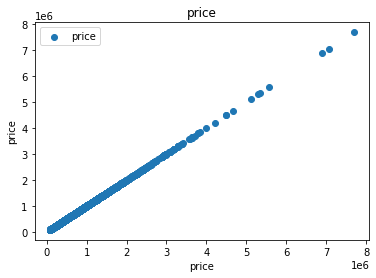

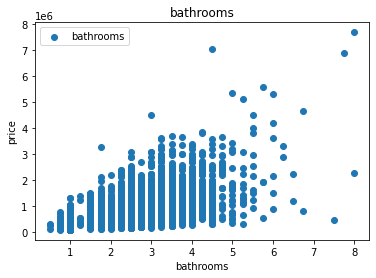

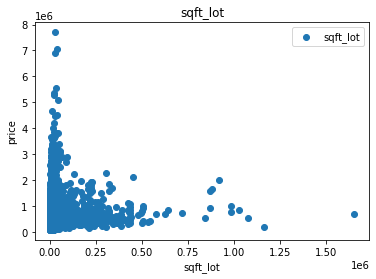

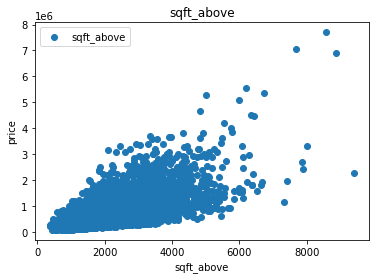

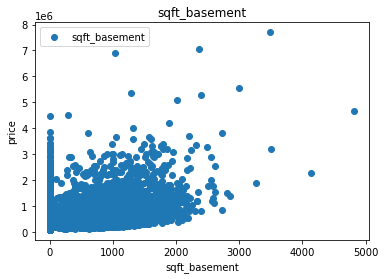

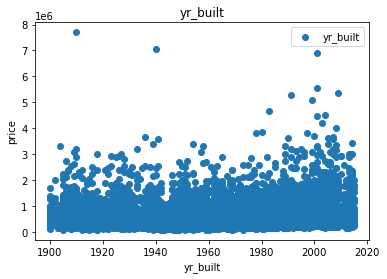

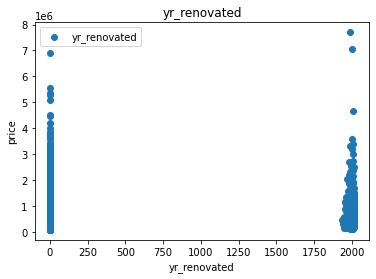

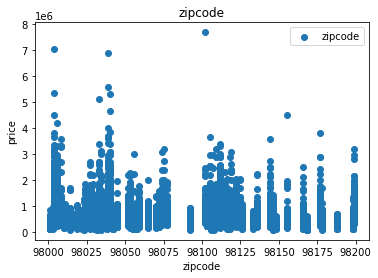

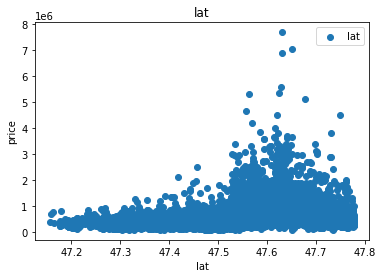

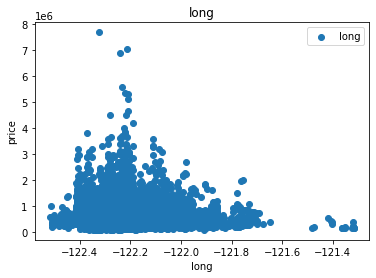

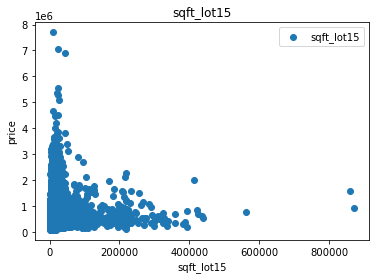

In [263]:
for col in var_cont.columns: 
    plt.scatter(var_cont[col], var_cont.price, label=col)
    plt.legend()
    plt.xlabel(col)
    plt.ylabel('price')
    plt.title(col)
    plt.show()

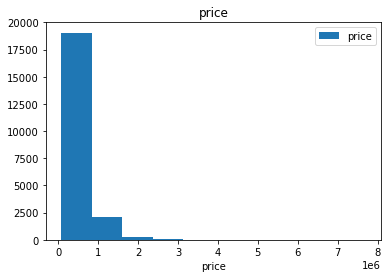

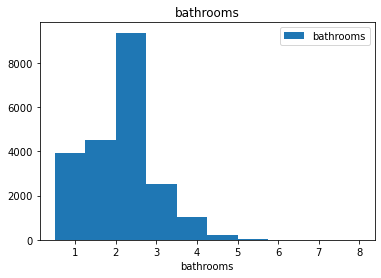

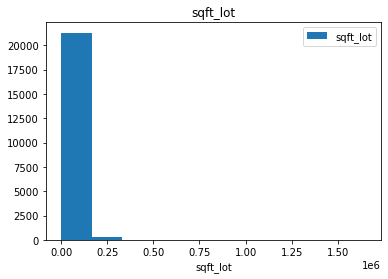

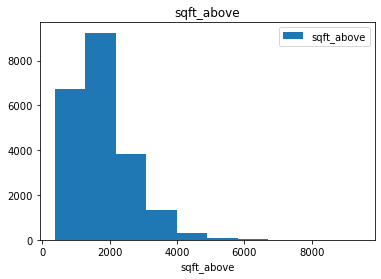

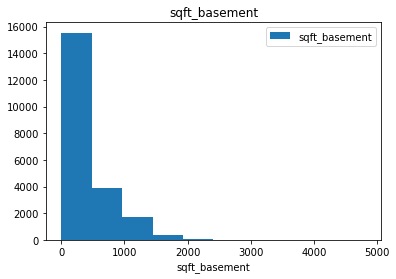

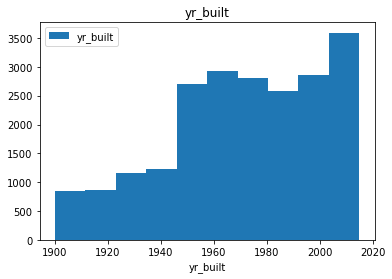

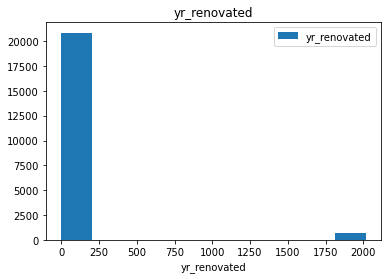

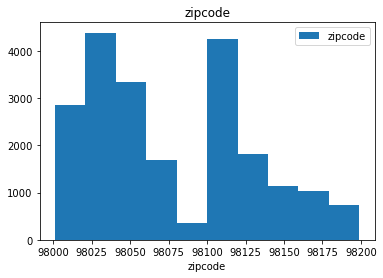

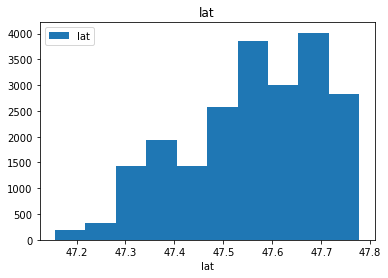

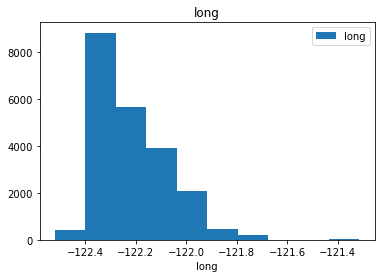

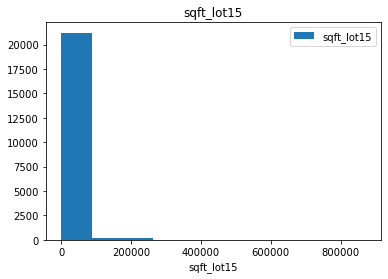

In [264]:
for col in var_cont.columns: 
    plt.hist(var_cont[col], label=col)
    plt.legend()
    plt.xlabel(col)
    plt.title(col)
    plt.show()

Going to try and log some th data to make it more normal
'yr_built', 'sqft_lot', 'sqft_lot15', sqft_above, sqft_basement, bathrooms

In [265]:
cont2 = var_cont.drop(['yr_built', 'sqft_lot', 'sqft_lot15', 'sqft_above', 'sqft_basement', 'bathrooms'], axis=1)
prelog = var_cont.drop(['price', 'yr_renovated', 'zipcode', 'lat', 'long'], axis = 1)

In [266]:
prelog['bathrooms'] = np.log(prelog['bathrooms'])
prelog['sqft_lot'] = np.log(prelog['sqft_lot'])
prelog['sqft_above'] = np.log(prelog['sqft_above'])
prelog['yr_built'] = np.log(prelog['yr_built'])
prelog['sqft_lot15'] = np.log(prelog['sqft_lot15'])

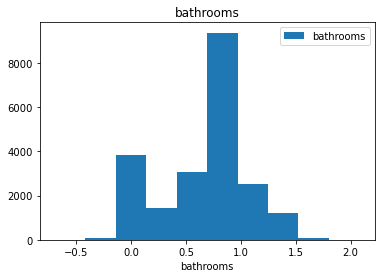

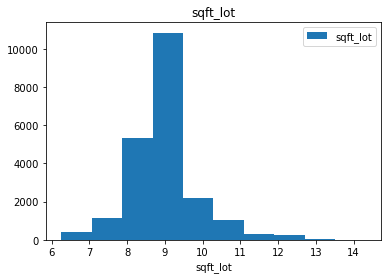

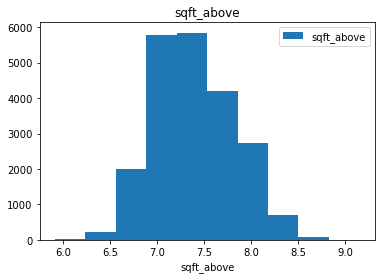

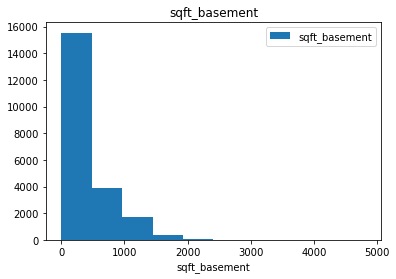

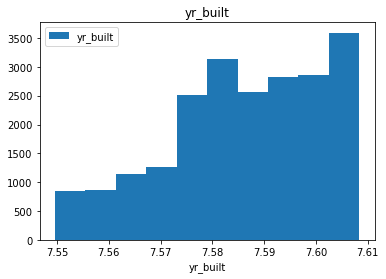

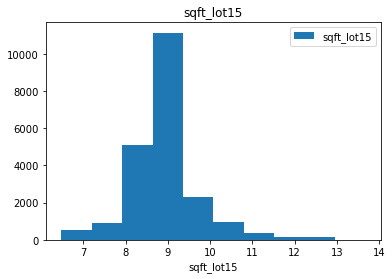

In [267]:
for col in prelog.columns: 
    plt.hist(prelog[col], label=col)
    plt.legend()
    plt.xlabel(col)
    plt.title(col)
    plt.show()

Data looks much more normal

In [268]:
# combining our columns again
log_cont = pd.concat([prelog, cont2], axis=1)
log_cont.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bathrooms      21596 non-null  float64
 1   sqft_lot       21596 non-null  float64
 2   sqft_above     21596 non-null  float64
 3   sqft_basement  21596 non-null  int64  
 4   yr_built       21596 non-null  float64
 5   sqft_lot15     21596 non-null  float64
 6   price          21596 non-null  float64
 7   yr_renovated   21596 non-null  float64
 8   zipcode        21596 non-null  int64  
 9   lat            21596 non-null  float64
 10  long           21596 non-null  float64
dtypes: float64(9), int64(2)
memory usage: 2.6 MB


In [269]:
#final date frame
cont_cat= pd.concat([log_cont, df_categories], axis=1)
cont_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 45 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bathrooms       21596 non-null  float64
 1   sqft_lot        21596 non-null  float64
 2   sqft_above      21596 non-null  float64
 3   sqft_basement   21596 non-null  int64  
 4   yr_built        21596 non-null  float64
 5   sqft_lot15      21596 non-null  float64
 6   price           21596 non-null  float64
 7   yr_renovated    21596 non-null  float64
 8   zipcode         21596 non-null  int64  
 9   lat             21596 non-null  float64
 10  long            21596 non-null  float64
 11  condition_2     21596 non-null  uint8  
 12  condition_3     21596 non-null  uint8  
 13  condition_4     21596 non-null  uint8  
 14  condition_5     21596 non-null  uint8  
 15  floors_1.5      21596 non-null  uint8  
 16  floors_2.0      21596 non-null  uint8  
 17  floors_2.5      21596 non-null 

# Modeling 

In [270]:
# splitting our data for test
X_train, X_test, y_train, y_test = train_test_split(
    cont_cat.drop('price', axis=1),
    cont_cat['price'],
    random_state=42
    )

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16197, 44), (5399, 44), (16197,), (5399,))

In [271]:
X = X_train
y = y_train

model = sm.OLS(y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     978.9
Date:                Thu, 25 Mar 2021   Prob (F-statistic):               0.00
Time:                        18:15:55   Log-Likelihood:            -2.1995e+05
No. Observations:               16197   AIC:                         4.400e+05
Df Residuals:                   16152   BIC:                         4.403e+05
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           4.133e+07   3.81e+06     10.859      0.000    3.39e+07    4.88e+07
bathrooms       4.697e+04   7062.963      6.650      0.000    3.31e+04    6.08e+04
sqft_lot       -4134.3507   4415.919     -0.936      0.349   -1.28e+04    4521.339
sqft_above      2.543e+05   8058.278     31.557      0.000    2.39e+05     2.7e+05
sqft_basement    136.9587      4.764     28.749      0.000     127.621     146.297
yr_built       -4.052e+06   1.73e+05    -23.406      0.000   -4.39e+06   -3.71e+06
sqft_lot15     -1.991e+04   4774.557     -4.171      0.000   -2.93e+04   -1.06e+04
yr_renovated      33.0424      4.449      7.427      0.000      24.322      41.763
zipcode         -590.1531     36.405    -16.211      0.000    -661.510    -518.796
lat             6.042e+05    1.2e+04     50.369      0.000    5.81e+05    6.28e+05
long           -1.425e+05   1.47e+04     -9.699      0.000   -1.71e+05   -1.14e+05
condition_2     7.813e+04   4.72e+04      1.657      0.098   -1.43e+04    1.71e+05
condition_3     7.682e+04   4.44e+04      1.730      0.084   -1.02e+04    1.64e+05
condition_4     1.085e+05   4.44e+04      2.442      0.015    2.14e+04    1.96e+05
condition_5     1.535e+05   4.46e+04      3.439      0.001     6.6e+04    2.41e+05
floors_1.5      2070.3054   6119.444      0.338      0.735   -9924.483    1.41e+04
floors_2.0       1.17e+04   5173.834      2.262      0.024    1561.595    2.18e+04
floors_2.5       1.27e+05   1.86e+04      6.833      0.000    9.05e+04    1.63e+05
floors_3.0      1.837e+04   1.11e+04      1.659      0.097   -3338.639    4.01e+04
floors_3.5      1.289e+05   7.32e+04      1.760      0.079   -1.47e+04    2.72e+05
waterfront_1.0   5.73e+05   2.22e+04     25.803      0.000    5.29e+05    6.16e+05
grade_4        -2.272e+05   1.97e+05     -1.151      0.250   -6.14e+05     1.6e+05
grade_5        -2.336e+05   1.93e+05     -1.213      0.225   -6.11e+05    1.44e+05
grade_6        -2.302e+05   1.92e+05     -1.197      0.231   -6.07e+05    1.47e+05
grade_7        -1.972e+05   1.92e+05     -1.025      0.305   -5.74e+05     1.8e+05
grade_8        -1.299e+05   1.92e+05     -0.675      0.500   -5.07e+05    2.47e+05
grade_9         2.947e+04   1.93e+05      0.153      0.878   -3.48e+05    4.07e+05
grade_10        2.403e+05   1.93e+05      1.247      0.212   -1.37e+05    6.18e+05
grade_11        5.529e+05   1.93e+05      2.865      0.004    1.75e+05    9.31e+05
grade_12        1.083e+06   1.94e+05      5.577      0.000    7.02e+05    1.46e+06
grade_13        2.574e+06   2.05e+05     12.580      0.000    2.17e+06    2.97e+06
bedrooms_2     -2.518e+04   1.67e+04     -1.507      0.132   -5.79e+04    7563.546
bedrooms_3     -6.376e+04   1.68e+04     -3.796      0.000   -9.67e+04   -3.08e+04
bedrooms_4     -8.229e+04   1.72e+04     -4.777      0.000   -1.16e+05   -4.85e+04
bedrooms_5  

R-Squared looks pretty good, but we have a lot of features with p-values past the threshold of .05. 
Will remove them
sqft_lot, grade_4, grade_5, grade_6, grade_7, grade_8, grade_9, grade_10, condition_2
condition_3, bedrooms_2, bedrooms_7, bedrooms_8,bedrooms_9, bedrooms_10, bedrooms_11
floors_1.5, floors_3.0

In [272]:
X_train2 =[]
X_test2 = []

In [273]:
X_train2 = X_train.drop(['sqft_lot', 'grade_4', 'grade_5', 'grade_6', 'grade_7', 
                         'grade_8', 'grade_9', 'grade_10', 'condition_2', 'condition_3',
                         'bedrooms_2', 'bedrooms_7', 'bedrooms_8','bedrooms_9',
                         'bedrooms_10', 'bedrooms_11', 'floors_1.5', 'floors_3.0', 'floors_3.5'],
                        axis=1)
X_test2 = X_test.drop(['sqft_lot', 'grade_4', 'grade_5', 'grade_6', 'grade_7', 
                         'grade_8', 'grade_9', 'grade_10', 'condition_2', 'condition_3',
                         'bedrooms_2', 'bedrooms_7', 'bedrooms_8','bedrooms_9',
                         'bedrooms_10', 'bedrooms_11', 'floors_1.5', 'floors_3.0', 'floors_3.5'],
                      axis=1)

In [274]:
X2 = X_train2
y2 = y_train

model2 = sm.OLS(y2, sm.add_constant(X2)).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     1362.
Date:                Thu, 25 Mar 2021   Prob (F-statistic):               0.00
Time:                        18:16:12   Log-Likelihood:            -2.2129e+05
No. Observations:               16197   AIC:                         4.426e+05
Df Residuals:                   16171   BIC:                         4.428e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2.262e+07   3.98e+06      5.679      0.000    1.48e+07    3.04e+07
bathrooms       5.069e+04   7493.892      6.764      0.000     3.6e+04    6.54e+04
sqft_above      4.266e+05   7228.948     59.009      0.000    4.12e+05    4.41e+05
sqft_basement    179.7943      4.897     36.717      0.000     170.196     189.392
yr_built       -2.925e+06   1.67e+05    -17.497      0.000   -3.25e+06    -2.6e+06
sqft_lot15     -1.619e+04   2474.717     -6.543      0.000    -2.1e+04   -1.13e+04
yr_renovated      35.0916      4.806      7.301      0.000      25.671      44.512
zipcode         -619.6257     39.299    -15.767      0.000    -696.656    -542.596
lat             6.985e+05   1.27e+04     55.142      0.000    6.74e+05    7.23e+05
long           -2.012e+05   1.57e+04    -12.826      0.000   -2.32e+05    -1.7e+05
condition_4     2.677e+04   4160.084      6.435      0.000    1.86e+04    3.49e+04
condition_5     7.523e+04   6585.457     11.423      0.000    6.23e+04    8.81e+04
floors_2.0       2.68e+04   4919.879      5.447      0.000    1.72e+04    3.64e+04
floors_2.5      1.719e+05   1.98e+04      8.669      0.000    1.33e+05    2.11e+05
waterfront_1.0  5.382e+05   2.41e+04     22.347      0.000    4.91e+05    5.85e+05
grade_11        4.922e+05   1.28e+04     38.334      0.000    4.67e+05    5.17e+05
grade_12        9.703e+05   2.61e+04     37.149      0.000    9.19e+05    1.02e+06
grade_13         2.39e+06   7.42e+04     32.226      0.000    2.24e+06    2.53e+06
bedrooms_3     -7.407e+04   5452.449    -13.584      0.000   -8.48e+04   -6.34e+04
bedrooms_4     -9.602e+04   6424.336    -14.947      0.000   -1.09e+05   -8.34e+04
bedrooms_5     -9.441e+04   8778.396    -10.755      0.000   -1.12e+05   -7.72e+04
bedrooms_6     -1.405e+05   1.64e+04     -8.576      0.000   -1.73e+05   -1.08e+05
view_1.0        1.515e+05   1.36e+04     11.148      0.000    1.25e+05    1.78e+05
view_2.0        9.993e+04   8275.897     12.075      0.000    8.37e+04    1.16e+05
view_3.0        1.982e+05   1.12e+04     17.767      0.000    1.76e+05     2.2e+05
view_4.0        3.221e+05   1.66e+04     19.355      0.000     2.9e+05    3.55e+05
==============================================================================
Omnibus:                     9119.226   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           226337.718
Skew:                           2.219   Prob(JB):                         0.00
Kurtosis:                      20.767   Cond. No.                     2.39e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.39e+08. This might indicate that there are
strong multicollineari

Well our score is much lower, but we got rid of the troublesome p values

Testing Model

In [275]:
linreg = LinearRegression()
linreg.fit(X_train2, y_train)

y_hat_train = linreg.predict(X_train2)
y_hat_test  = linreg.predict(X_test2)

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse  = mean_squared_error(y_test, y_hat_test)

print('Train: ' + str(train_mse.round()))
print('Test: ' + str(test_mse.round()))


Train: 43118392746.0
Test: 46097661065.0


In [282]:
print (math.sqrt(train_mse))
print (math.sqrt(test_mse))

207649.68756533662
214703.65871311468


Our MSE did go up, but not by a whole lot